# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhamad Rafif Rezha Firmansyah
- **Email:** rafifrezhaa@gmail.com
- **ID Dicoding:** rafifrezha

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Bagaimana distribusi status pesanan berdasarkan kategori produk dalam satu tahun terakhir?
- Pertanyaan 2

Kategori produk mana yang memberikan nilai penjualan tertinggi dalam 3 bulan terakhir, dan bagaimana kontribusi setiap kategori terhadap total penjualan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling


### Gathering Data

**Load Table Orders**

In [ ]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Load Table Orders Items**

In [ ]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Load Products**

In [ ]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Load Product Category**

In [ ]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- **orders_df**: Mengidentifikasi trend pasar pembelian seperti frekuensi pemesanan, waktu puncak dan waktu pengiriman, Untuk mengoptimalkan proses pemesanan
- **order_items_df**: Ketahui produk yang paling sering dibeli untuk memfokuskan kampanye pemasaran pada produk terlaris
- **products_df**: Identifikasi kategori produk dengan penjualan tertinggi dan fokus pada kategori yang membutuhkan lebih banyak perhatian
- **product_category_df**: Menyederhanakan analisis dengan menggunakan nama kategori produk dalam bahasa Inggris, yang relevan untuk audiens global.


### Assessing Data

Menilai Tabel Orders

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
print(orders_df.isna().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
orders_df.describe()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai Tabel Order Items

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
print(order_items_df.isna().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
orders_df.describe()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai Tabel Product

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
print(products_df.isna().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai Tabel Product Category

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
print(product_category_df.isna().sum())
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
1. **orders_df:**
    *   Jumlah entri: 99.441
    *   Tidak ada duplikasi.
    *   Missing values:
      *   order_approved_at: 160 nilai hilang.
      *   order_delivered_carrier_date: 1.783 nilai hilang.
      *   order_delivered_customer_date: 2.965 nilai hilang.
    *   Terdapat kesalahan tipe data pada kolom tanggal:
      *   order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.

2. **order_items_df:**
    *   Jumlah entri: 112.650
    *   Tidak ada missing value atau duplikasi.
    *   Terdapat kesalahan tipe data pada shipping_limit_date.

3. **products_df:**
    *   Jumlah entri: 32.951
    *   Missing values terdapat di beberapa kolom:
      *   product_category_name: 610 nilai hilang.
      *   product_name_lenght, product_description_lenght, dan product_photos_qty juga memiliki nilai hilang.
      *   2 nilai hilang pada atribut produk fisik (product_weight_g, product_length_cm, dll).
    *   Tidak ada duplikasi.

4. **product_category_df:**
    *   Jumlah entri: 71
    *   Tidak ada missing value atau duplikasi.

### Cleaning Data

M**enangani Kesalahan Tipe Data**


Tabel Orders

In [ ]:
datetime_columns = ["order_approved_at", "order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Tabel Order_Items

In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Menangani Missing Value**

Tabel Orders

In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [ ]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(value="2018-02-27 04:31:10")
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [ ]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [ ]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(value="2018-02-27 04:31:10")
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-02-27 04:31:10,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-02-27 04:31:10,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-02-27 04:31:10,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-02-27 04:31:10,2018-02-27 04:31:10,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-02-27 04:31:10,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-02-27 04:31:10,2018-02-27 04:31:10,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-02-27 04:31:10,NaT,2017-09-15


In [ ]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [ ]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(value="2018-02-27 04:31:10")
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_estimated_delivery_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [ ]:
orders_df.order_estimated_delivery_date.value_counts()

,count
order_estimated_delivery_date,
2017-12-20,522
2018-03-12,516
2018-05-29,513
2018-03-13,513
2018-02-14,507
...,...
2016-11-14,1
2016-11-07,1
2016-09-30,1


In [ ]:
orders_df['order_estimated_delivery_date'] = orders_df['order_estimated_delivery_date'].fillna(value="2018-02-27 04:31:10")
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Pada Products

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
products_df['product_category_name'] = products_df['product_category_name'].fillna(value="cama_mesa_banho")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [ ]:
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(value="404.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [ ]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,610
404.0,94
729.0,86
651.0,66
703.0,66
...,...
2795.0,1
2308.0,1
3698.0,1


In [ ]:
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(value="404.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,404.0,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [ ]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(value="60.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [ ]:
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(value="1.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [ ]:
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(value="200.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,NaN,NaN,NaN


In [ ]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [ ]:
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(value="16.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,NaN,NaN


In [ ]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [ ]:
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(value="10.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,2


In [ ]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,NaN


In [ ]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [ ]:
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(value="11.0")
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**

Menangani kesalahan Tipe Data
- Mengubah kolom yang berisi tanggal dan waktu ke format datetime menggunakan pd.to_datetime().
    *   Kolom yang Dikonversi
      *   Dari tabel orders_df: order_approved_at, order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.
      *   Dari tabel order_items_df: shipping_limit_date.
    *   **Hasil:** Semua kolom tanggal kini memiliki format yang tepat, memudahkan analisis berdasarkan waktu dan pengelompokan data berdasarkan tanggal.

Menangani Missing Values
- Mengisi nilai yang hilang di beberapa kolom dengan nilai default yang dianggap sesuai.
  *   orders_df
    *   order_approved_at: Diisi dengan "2018-02-27 04:31:10"
    *   order_delivered_carrier_date: Diisi dengan "2018-02-27 04:31:10"
    *   order_delivered_customer_date: Diisi dengan "2018-02-27 04:31:10"
    *   order_estimated_delivery_date: Diisi dengan "2018-02-27 04:31:10"

  *   products_df
    *   product_category_name: Diisi dengan "cama_mesa_banho"
    *   product_description_lenght: Diisi dengan 404.0
    *   product_name_lenght: Diisi dengan 60.0
    *   product_photos_qty: Diisi dengan 1.0
    *   product_weight_g: Diisi dengan 200.0
    *   product_length_cm: Diisi dengan 16.0
    *   product_height_cm: Diisi dengan 10.0
    *   product_width_cm: Diisi dengan 11.0
  *   **Hasil:** Pengisian nilai yang hilang menjaga kelengkapan data dan memastikan bahwa analisis dapat dilakukan tanpa gangguan dari missing values.

Analisis Statistik Nilai
*   Langkah yang Dilakukan: Menggunakan .value_counts() untuk memeriksa distribusi data di kolom yang telah diisi
*   Hasil: Memastikan bahwa nilai default yang digunakan untuk pengisian tidak terlalu berbeda dari distribusi nilai lainnya di kolom tersebut, sehingga hasil analisis tetap representatif



## Exploratory Data Analysis (EDA)

Exploratory Data Order & Product

In [ ]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, product_category_df, how='left', on='product_category_name')

latest_order_date = orders_df['order_purchase_timestamp'].max()
one_year_ago = latest_order_date - pd.DateOffset(years=1)
orders_last_year = merged_df[merged_df['order_purchase_timestamp'] >= one_year_ago]

status_distribution = orders_last_year.groupby(['product_category_name_english', 'order_status']).size().unstack().fillna(0)

print("Distribusi Status Pesanan Berdasarkan Kategori Produk dalam Satu Tahun Terakhir:")
print(status_distribution)

Distribusi Status Pesanan Berdasarkan Kategori Produk dalam Satu Tahun Terakhir:
order_status                   canceled  delivered  invoiced  processing  \
product_category_name_english                                              
agro_industry_and_commerce          0.0      178.0       1.0         0.0   
air_conditioning                    1.0      181.0       0.0         0.0   
art                                 1.0      169.0       0.0         0.0   
arts_and_craftmanship               0.0       22.0       0.0         0.0   
audio                               1.0      262.0       0.0         0.0   
...                                 ...        ...       ...         ...   
stationery                          8.0     1970.0       7.0         3.0   
tablets_printing_image              0.0       34.0       0.0         0.0   
telephony                           6.0     3044.0      17.0         7.0   
toys                               22.0     2476.0       3.0        10.0   
watches

In [ ]:
three_months_ago = latest_order_date - pd.DateOffset(months=3)
orders_last_3_months = merged_df[merged_df['order_purchase_timestamp'] >= three_months_ago]

sales_by_category = orders_last_3_months.groupby('product_category_name_english')['price'].sum().reset_index()

total_sales_3_months = sales_by_category['price'].sum()
sales_by_category['contribution_to_total'] = (sales_by_category['price'] / total_sales_3_months) * 100

sales_by_category = sales_by_category.sort_values(by='price', ascending=False)
print("Kategori Produk dengan Nilai Penjualan Tertinggi dalam 3 Bulan Terakhir dan Kontribusinya:")
print(sales_by_category)

Kategori Produk dengan Nilai Penjualan Tertinggi dalam 3 Bulan Terakhir dan Kontribusinya:
   product_category_name_english      price  contribution_to_total
40                 health_beauty  173329.04              12.831122
64                 watches_gifts  117563.16               8.702911
46                    housewares   99746.97               7.384022
7                 bed_bath_table   98216.02               7.270690
60                sports_leisure   83090.19               6.150962
..                           ...        ...                    ...
26        fashio_female_clothing     129.97               0.009621
30                 fashion_sport      69.90               0.005175
33                       flowers      47.99               0.003553
43                home_comfort_2      12.90               0.000955
24                  dvds_blu_ray       8.90               0.000659

[65 rows x 3 columns]


**Insight:**

Distribusi Status Pesanan Berdasarkan Kategori Produk dalam Satu Tahun Terakhir:

- Kategori Produk dengan Penjualan Tertinggi:
  *   Health & Beauty (Kesehatan & Kecantikan) adalah kategori dengan penjualan tertinggi dalam 3 bulan terakhir, menghasilkan total pendapatan sebesar 173.329,04 atau berkontribusi 12,83% terhadap total penjualan. Ini menunjukkan bahwa produk kecantikan dan kesehatan memiliki permintaan yang besar dan memberikan kontribusi signifikan terhadap pendapatan

- Pesanan Dibatalkan:
  *   Kategori toys (mainan) memiliki 22 pesanan yang dibatalkan, sedangkan telephony memiliki 6 pesanan yang dibatalkan. Kategori mainan mengalami pembatalan tertinggi dibanding kategori lainnya.
  *   Stationery (alat tulis) memiliki total pengiriman yang besar (1.970 pesanan delivered), ada 8 pesanan yang dibatalkan, menunjukkan bahwa alat tulis juga merupakan kategori dengan pembatalan yang cukup tinggi.

- Pesanan Dibatalkan:
  *   Kategori seperti watches_gifts dan toys juga memiliki beberapa pesanan yang sedang dalam proses atau masih dalam status "processing".
  *   Ini menunjukkan adanya permintaan yang signifikan di kategori ini, meskipun ada beberapa tantangan dalam memenuhi semua pesanan tepat waktu.

  Kategori Produk dengan Nilai Penjualan Tertinggi dalam 3 Bulan Terakhir dan Kontribusinya:

  - Kategori Produk dengan Penjualan Tertinggi:
  *   Health & Beauty adalah kategori dengan penjualan tertinggi dalam 3 bulan terakhir, menghasilkan total pendapatan sebesar 173.329,04 atau berkontribusi 12,83% terhadap total penjualan. Ini menunjukkan bahwa produk kecantikan dan kesehatan memiliki permintaan yang besar dan memberikan kontribusi signifikan terhadap pendapatan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi status pesanan berdasarkan kategori produk dalam satu tahun terakhir?

In [ ]:
latest_order_date = orders_df['order_purchase_timestamp'].max()
one_year_ago = latest_order_date - pd.DateOffset(years=1)
orders_last_year = orders_df[orders_df['order_purchase_timestamp'] >= one_year_ago]

merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

avg_delivery_time_by_category = merged_df.groupby('product_category_name_english')['delivery_time'].mean().reset_index()
avg_delivery_time_by_category = avg_delivery_time_by_category.sort_values(by='delivery_time', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='product_category_name_english', y='delivery_time', data=avg_delivery_time_by_category)
plt.xticks(rotation=90)
plt.title('Rata-rata Waktu Pengiriman Berdasarkan Kategori Produk dalam Satu Tahun Terakhir')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)')
plt.tight_layout()
plt.show()


IndentationError: unexpected indent (<ipython-input-329-b0a67e8c270b>, line 2)

### Pertanyaan 2: Kategori produk mana yang memberikan nilai penjualan tertinggi dalam 3 bulan terakhir, dan bagaimana kontribusi setiap kategori terhadap total penjualan?

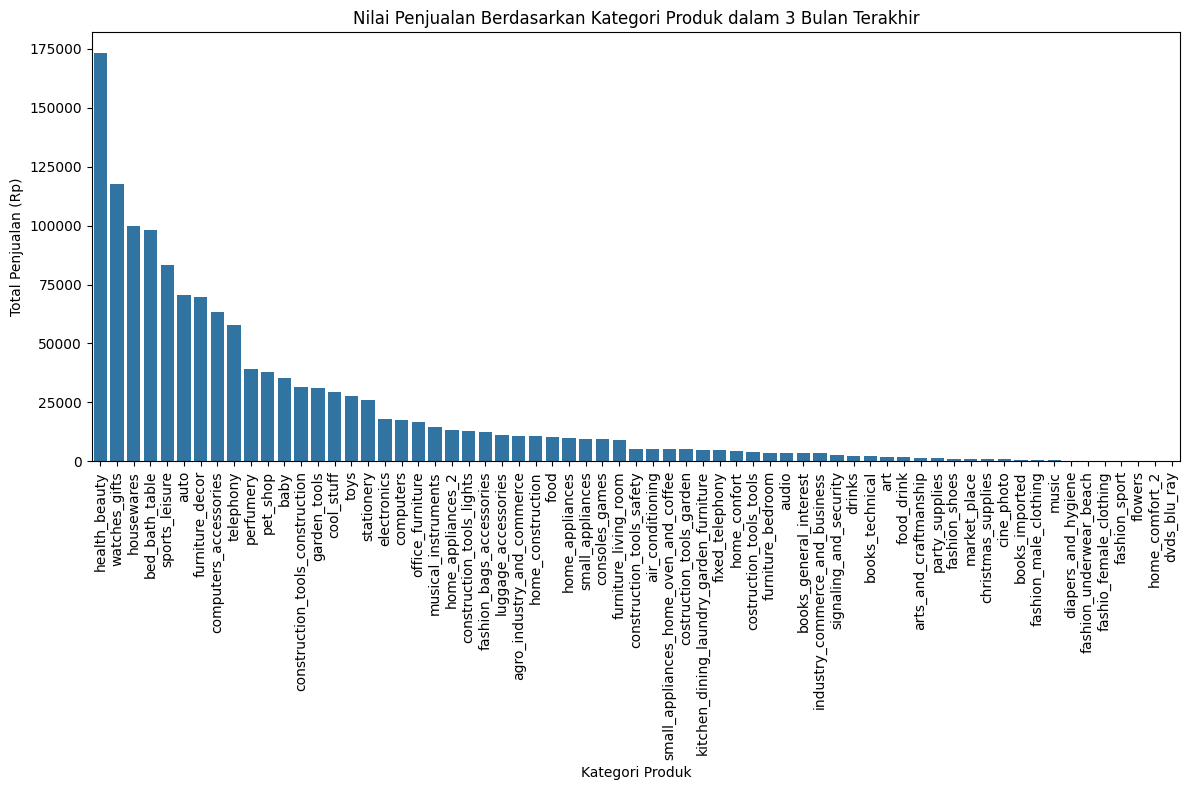

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

latest_order_date = orders_df['order_purchase_timestamp'].max()
three_months_ago = latest_order_date - pd.DateOffset(months=3)

orders_last_3_months = orders_df[orders_df['order_purchase_timestamp'] >= three_months_ago]

merged_df = pd.merge(orders_last_3_months, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, product_category_df, how='left', on='product_category_name')

sales_by_category = merged_df.groupby('product_category_name_english')['price'].sum().reset_index()


sales_by_category = sales_by_category.sort_values(by='price', ascending=False)

total_sales_3_bulan = sales_by_category['price'].sum()

kategori_penjualan_tertinggi = sales_by_category.iloc[0]

sales_by_category['contribution_to_total'] = (sales_by_category['price'] / total_sales_3_bulan) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x='product_category_name_english', y='price', data=sales_by_category)
plt.xticks(rotation=90)
plt.title('Nilai Penjualan Berdasarkan Kategori Produk dalam 3 Bulan Terakhir')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan (Rp)')
plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1: Distribusi Status Pesanan Berdasarkan Kategori Produk dalam Satu Tahun Terakhir:
  *   Kategori Watches & Gifts dan Telephony memiliki jumlah pesanan yang dikirim tertinggi. Ini menunjukkan permintaan tinggi di kategori ini.
  *   Pembatalan pesanan tertinggi terjadi pada kategori Toys, namun kategori ini tetap populer untuk pengiriman.


- Pertanyaan 2: Kategori Produk dengan Nilai Penjualan Tertinggi dalam 3 Bulan Terakhir:
  *   Health & Beauty menjadi kategori dengan penjualan tertinggi, berkontribusi 12,83% dari total penjualan.
  *   Watches & Gifts dan Housewares juga berkontribusi besar terhadap total penjualan, menjadikannya kategori penting untuk fokus pemasaran.

## Analisis Lanjutan (RFM)

Hasil RFM Analysis:
                        customer_id  frequency  monetary  recency
0  000598caf2ef4117407665ac33275130          1   1107.00       67
1  001df1ee5c36767aa607001ab1a13a06          1     29.99       72
2  002554bdf9eb99618d8189c3a89fdd52          1    229.00       64
3  0026955706fd4e2fa997f3f4c18d485a          1     99.90       58
4  002905287304e28c0218389269b4759b          1     13.47       87


Text(0.5, 0.98, 'Best Customers Based on RFM Parameters (customer_id)')

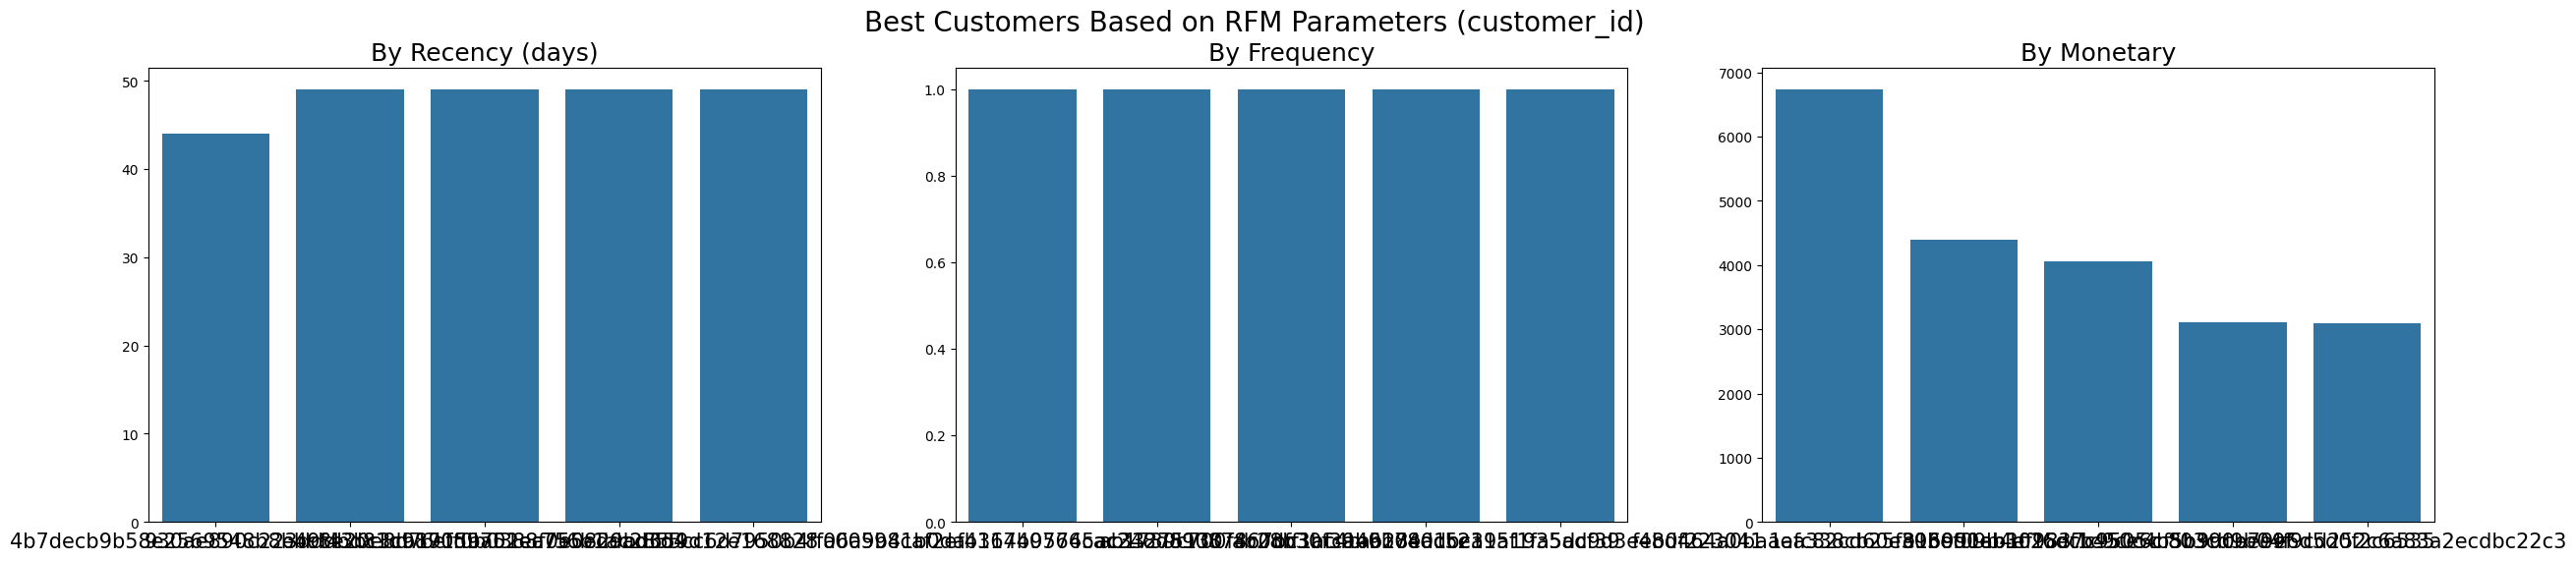

In [ ]:
rfm_df = merged_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
latest_order_date = pd.to_datetime(orders_df["order_purchase_timestamp"].max())
rfm_df["recency"] = (latest_order_date - rfm_df["max_order_timestamp"]).dt.days

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

print("Hasil RFM Analysis:")
print(rfm_df.head())

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)

## Conclusion

- Pertanyaan 1: Bagaimana distribusi status pesanan berdasarkan kategori produk dalam satu tahun terakhir?
  *   Distribusi status pesanan menunjukkan bahwa kategori Watches & Gifts dan Telephony memiliki jumlah pesanan yang dikirim tertinggi, mengindikasikan permintaan yang tinggi pada kategori ini. Sementara itu, kategori Toys mencatat jumlah pembatalan pesanan tertinggi, meskipun tetap menjadi salah satu kategori populer untuk pengiriman. Hal ini bisa menunjukkan adanya tantangan dalam pengelolaan produk atau ketidaksesuaian ekspektasi pelanggan di kategori Toys.

- Pertanyaan 2: Kategori produk mana yang memberikan nilai penjualan tertinggi dalam 3 bulan terakhir, dan bagaimana kontribusi setiap kategori terhadap total penjualan?
  *   Kategori Health & Beauty menjadi kategori dengan nilai penjualan tertinggi dalam 3 bulan terakhir, menyumbang 12,83% dari total penjualan. Kategori ini diikuti oleh Watches & Gifts dan Housewares yang juga berkontribusi besar terhadap total penjualan. Fokus pemasaran dan pengembangan produk pada kategori-kategori ini penting untuk mempertahankan dan meningkatkan pendapatan perusahaan ke depannya.




In [ ]:
merged_df.to_csv("all_data.csv", index=False)